# Exploration

In [1]:
from imports import *
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split

In [2]:
## Getting data
df = pd.read_csv('data_science.csv')

In [3]:
## Initial cleaning
df = prep_data(df)

In [4]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['year', 'experience', 'ability', 'skill'])

In [5]:
df.requirements = df.requirements.apply(clean)

In [6]:
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((112, 13), (48, 13), (40, 13))

# Requirements vs. Degree

In [7]:
labels = pd.concat([train.label.value_counts(),
                    train.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
h,101,0.901786
b,11,0.098214


In [8]:
all_text = ' '.join(train.requirements)
b_text = ' '.join(train[train.label == 'b'].requirements)
h_text = ' '.join(train[train.label == 'h'].requirements)
all_text = clean(all_text)
b_text = clean(b_text)
h_text = clean(h_text)

In [9]:
pd.Series(all_text.split()).value_counts().head(20)

data           533
science        199
language       163
programming    157
learning       142
analytics      124
degree         119
python         116
sql            114
analysis       114
business       105
machine        104
engineering     99
statistic       92
r               90
microsoft       89
knowledge       87
c               78
working         75
strong          75
dtype: int64

In [10]:
all_freq = pd.Series(all_text.split()).value_counts()
b_freq = pd.Series(b_text.split()).value_counts()
h_freq = pd.Series(h_text.split()).value_counts()

In [11]:
word_counts = pd.concat([all_freq, b_freq, h_freq], sort=True, axis=1)
word_counts.columns = ['all', 'b', 'h']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [12]:
word_counts.sort_values(by='all', ascending=False)

,all,b,h
data,533,67,466
science,199,35,164
language,163,17,146
programming,157,19,138
learning,142,6,136
...,...,...,...
identity,1,0,1
identifies,1,1,0
iceberg,1,0,1
hunting,1,0,1


In [13]:
word_counts.assign(p_b=word_counts.b / word_counts['all'],p_h=word_counts.h / word_counts['all'])

,all,b,h,p_b,p_h
0,1,1,0,1.000000,0.000000
01,1,0,1,0.000000,1.000000
1,14,1,13,0.071429,0.928571
10,1,0,1,0.000000,1.000000
100,2,0,2,0.000000,1.000000
...,...,...,...,...,...
youre,1,0,1,0.000000,1.000000
youve,2,0,2,0.000000,1.000000
z,1,0,1,0.000000,1.000000
zero,1,0,1,0.000000,1.000000


<AxesSubplot:>

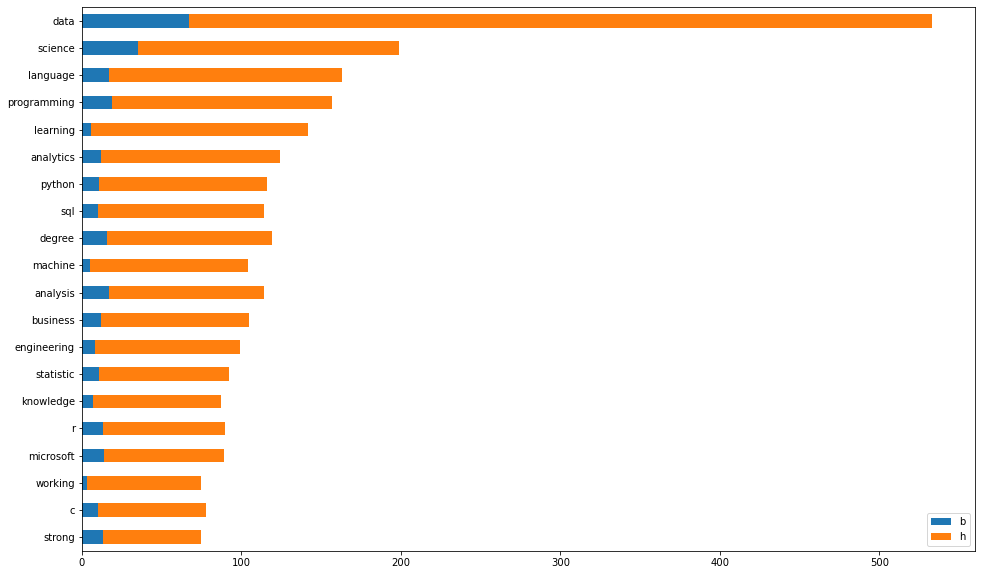

In [14]:
word_counts.assign(p_b=word_counts.b / word_counts['all'],p_h=word_counts.h / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['b', 'h']]\
    .sort_values(by='h')\
    .plot.barh(stacked=True, figsize = (16,10))

In [15]:
word_counts[(word_counts.b > 10) & (word_counts.h > 10)]\
    .assign(ratio=lambda df: df.b/df.h)\
    .sort_values(by='ratio')

,all,b,h,ratio
python,116,11,105,0.104762
analytics,124,12,112,0.107143
language,163,17,146,0.116438
business,105,12,93,0.129032
statistic,92,11,81,0.135802
programming,157,19,138,0.137681
data,533,67,466,0.143777
degree,119,16,103,0.155340
r,90,13,77,0.168831
field,74,11,63,0.174603


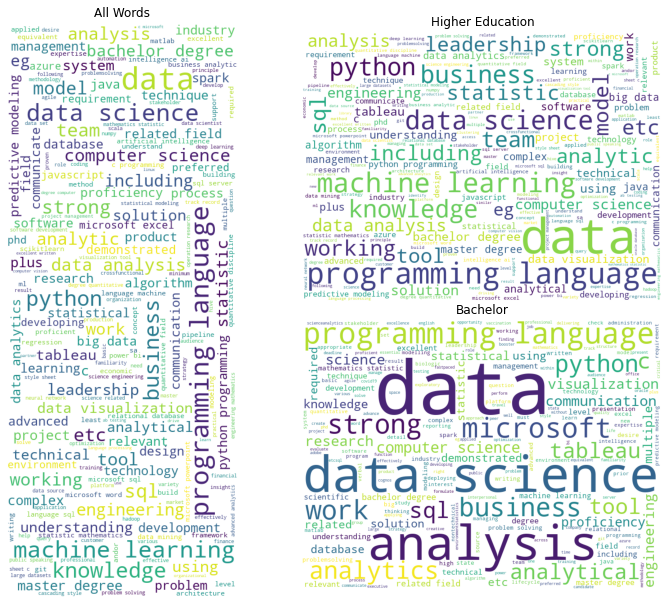

In [16]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
h_cloud = WordCloud(background_color='white', height=600, width=800).generate(h_text)
b_cloud = WordCloud(background_color='white', height=600, width=800).generate(b_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(h_cloud)
axs[2].imshow(b_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Higher Education')
axs[2].set_title('Bachelor')

for ax in axs: ax.axis('off')

### Bigrams

In [17]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(programming, language)       132
(data, science)               110
(machine, learning)           102
(computer, science)            57
(data, analysis)               56
(data, visualization)          41
(bachelor, degree)             36
(big, data)                    31
(r, programming)               31
(related, field)               30
(master, degree)               29
(python, programming)          29
(data, analytics)              27
(predictive, modeling)         26
(python, r)                    26
(microsoft, excel)             22
(artificial, intelligence)     20
(statistic, mathematics)       19
(data, mining)                 19
(c, programming)               19
dtype: int64

#### Higher Education

In [18]:
top_20_h_bigrams = (pd.Series(nltk.ngrams(h_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_h_bigrams.head()

(programming, language)    116
(machine, learning)         97
(data, science)             92
(data, analysis)            49
(computer, science)         48
dtype: int64

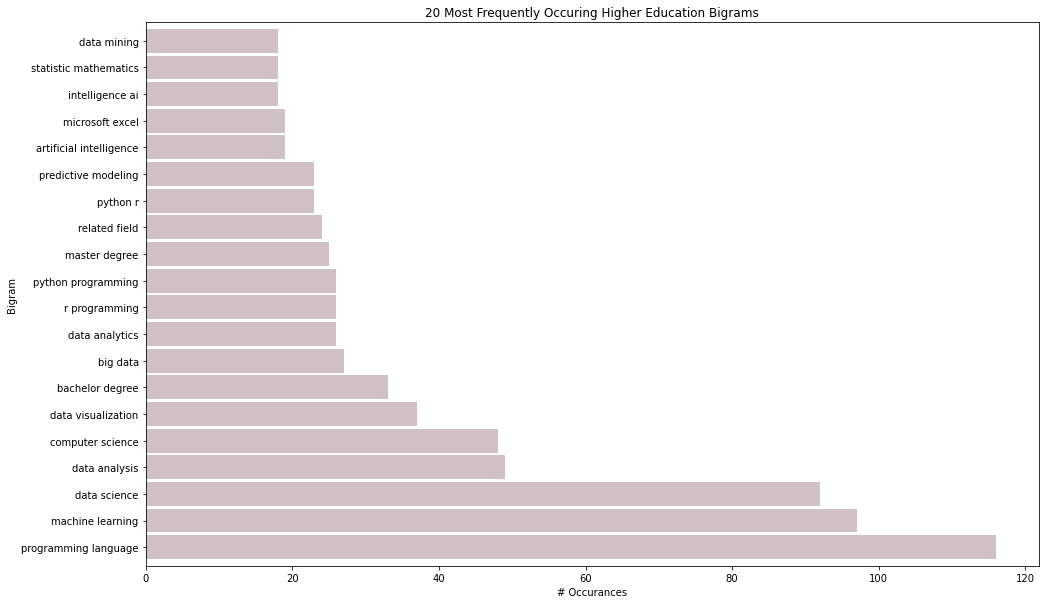

In [19]:
top_20_h_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Higher Education Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_h_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

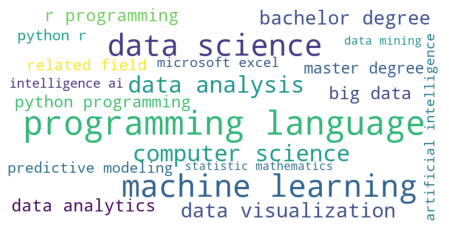

In [20]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_h_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [21]:
top_20_b_bigrams = (pd.Series(nltk.ngrams(b_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_b_bigrams.head()

(data, science)            18
(programming, language)    16
(computer, science)         9
(data, analysis)            7
(science, related)          6
dtype: int64

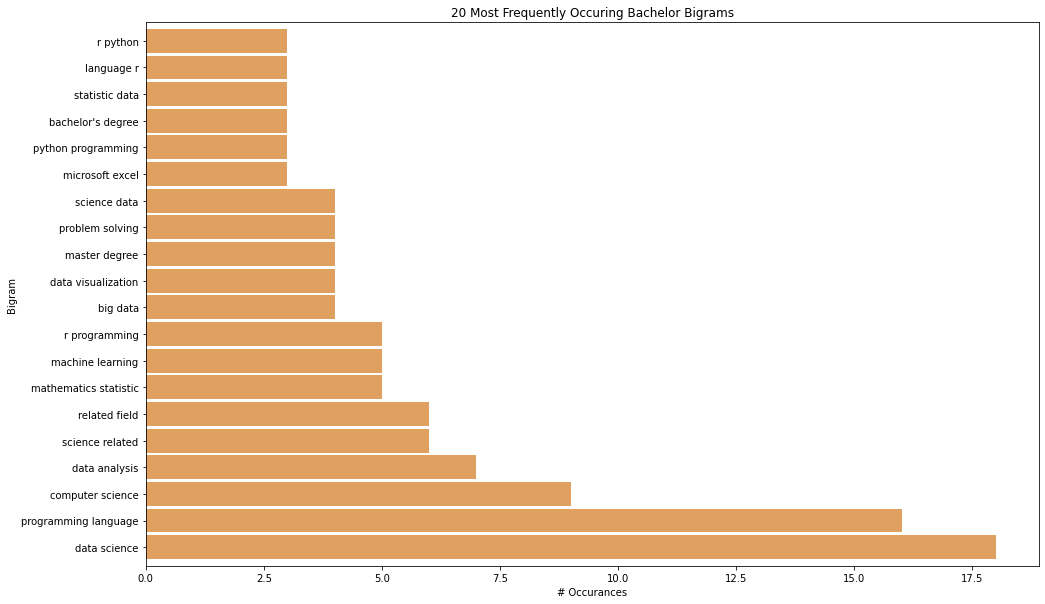

In [22]:
top_20_b_bigrams.sort_values(ascending=False).plot.barh(color='#E0A060', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Bachelor Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_b_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

***

## Role vs. Degree

In [23]:
df.role.value_counts()

Data Scientist          89
Data Analyst            48
Data Science Manager    32
Data Engineer           31
Name: role, dtype: int64

In [25]:
df.groupby('role').label.value_counts()

role                  label
Data Analyst          h        40
                      b         8
Data Engineer         h        30
                      b         1
Data Science Manager  h        29
                      b         3
Data Scientist        h        82
                      b         7
Name: label, dtype: int64